# Notebook for documenting and providing examples for using the functions in the PandemiXModelFunctions.py module

In [33]:
# Import scripts
import sys
sys.path.append("./../scripts")
import PandemiXFunctions as pf
import PandemiXModelFunctions as pmf

# Load numpy and pyplot, and set some pyplot-preferences
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }

In [34]:
# Reload package, in case anything has changed since kernel was started
import importlib 
importlib.reload(pmf)

<module 'PandemiXModelFunctions' from 'c:\\Users\\rakrpe\\GithubRepos\\PandemiX\\modelling\\./../scripts\\PandemiXModelFunctions.py'>

# Basic functionality:

In [35]:
## Define a modelling scheme
# Model-name is used to get both differential equations and meta-information (Variable and parameter-names)
# List of models available with pmf.getAvailableModels()
print(pmf.getAvailableModels())
ModelName = 'SIR'

# For meta-information about model, pmf.getModel(ModelName) can be used
_,curMeta = pmf.getModel(ModelName)
print(f'Variable names: {curMeta[0]}, parameter names: {curMeta[1]}')

# Initial conditions can be defined as either a dict or an array (array order as variable-meta list).
# If values are missing from dict, they are assumed as zero
InitialConditions = {'S':0.99,'I':0.01}

# Similar for parameters: Dict or array
Parameters = {'beta': 0.3, 'gamma': 0.15}

# First and last time-point to simulate
tStart = 0
tEnd = 50

['SIR', 'SIHR', 'SIYR', 'SVIYRR', 'OmikronDeltaFull']
Variable names: ['S', 'I'], parameter names: ['beta', 'gamma']


In [36]:
# Create the Scheme object
curScheme = pmf.Scheme(ModelName=ModelName,InitialConditions=InitialConditions,Parameters=Parameters,tStart=tStart,tEnd=tEnd)

# Printing the scheme provides are readable description of the scheme
print(curScheme)

-------
Model: SIR.
Complete simulation running from t=0 until t=50
Initial conditions: {'S': 0.99, 'I': 0.01}
Parameters: {'beta': 0.3, 'gamma': 0.15}


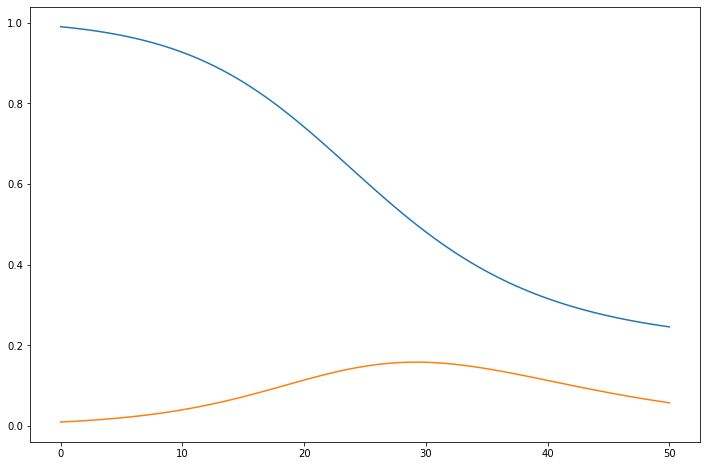

In [38]:
# Simulate the scheme using the simulate function
curScheme.simulate()
# For higher time-resolution, the flag tRes can be set (default: 100)
# curScheme.simulate(tRes=1000)
curScheme.simulate()

# Results are saved in the "result" attribute
curScheme.result

# The result-object has attributes 
# "t", the time as a 1D array, 
# "y", variables representented as matrix
# and additionally individual variables as 1D arrays.
plt.figure() 
plt.plot(curScheme.result.t,curScheme.result.S)
plt.plot(curScheme.result.t,curScheme.result.I)
plt.show()

(<Figure size 864x576 with 2 Axes>,
 array([<AxesSubplot:ylabel='S'>, <AxesSubplot:ylabel='I'>], dtype=object))

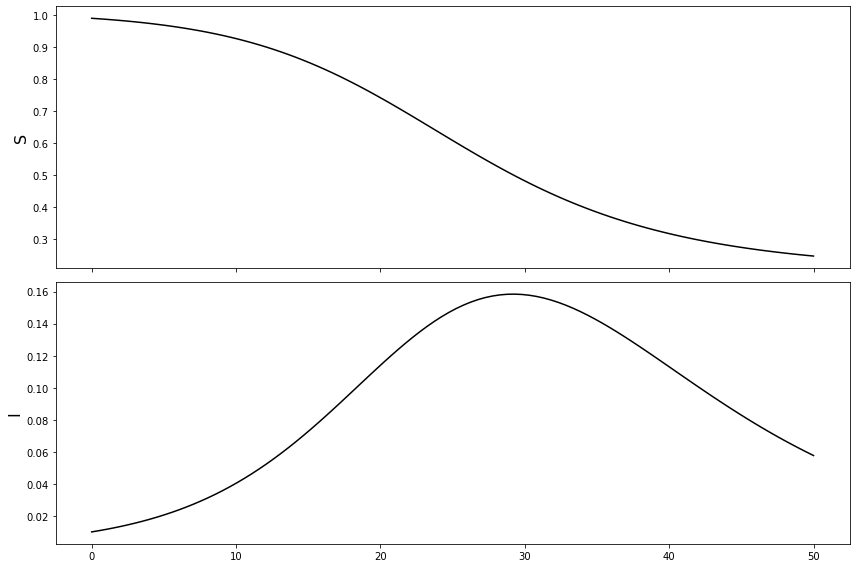

In [39]:
# In addition, a quick "plot()" function is included
curScheme.plot() 
# If simulation has not already been run, plot() firsts runs simulation

# Additional features of the plot() function to be described later

# Adding changes at given time-point

# Gillespie things

In [40]:
# Reload package, in case anything has changed since kernel was started
import importlib 
importlib.reload(pmf)

<module 'PandemiXModelFunctions' from 'c:\\Users\\rakrpe\\GithubRepos\\PandemiX\\modelling\\./../scripts\\PandemiXModelFunctions.py'>

In [41]:

testMeta = ({
     'beta * S * I' : ['S','I'],
     'gamma * I' : ['I',None]
},
['S','I'],['beta','gamma'])


popSize = 1000
I_0 = 10/popSize 
S_0 = 1 - I_0 
# I_0 = 10
# S_0 = popSize - I_0 

init = {'S':S_0,'I':I_0}

beta = 0.5
gamma = 0.2

pars = {'beta':beta,'gamma':gamma}


# Run a test simulation
tEnd = 250
sch1 = pmf.Scheme(testMeta,init,pars,0,tEnd,Changes=[])
sch1.tRes = 1000
sch1.simulate()


In [47]:
# fig,ax = plt.subplots()
# ax.plot(sch1.result.t,sch1.result.S)
# ax.plot(sch1.result.t,sch1.result.I)

In [43]:
# print(sch1)
curMeta = sch1.ModelName

In [44]:
   
# testMeta = ({
#      'beta * S * I' : ['S','I'],
#      'gamma * I' : ['I',None]
# },
# ['S','I'],['beta','gamma'])

curMeta = sch1.ModelName

# ArbitraryGillespieCall(0,[0.99,0.01],(2/7,1/7),*testMeta)
# curInit =100* np.array([0.99,0.01])
testInit = [20000,1000]
pmf.ArbitraryGillespieCall(0,testInit,(2/7,1/7),*curMeta)

(9.98173114607809e-08, [19999, 1001])

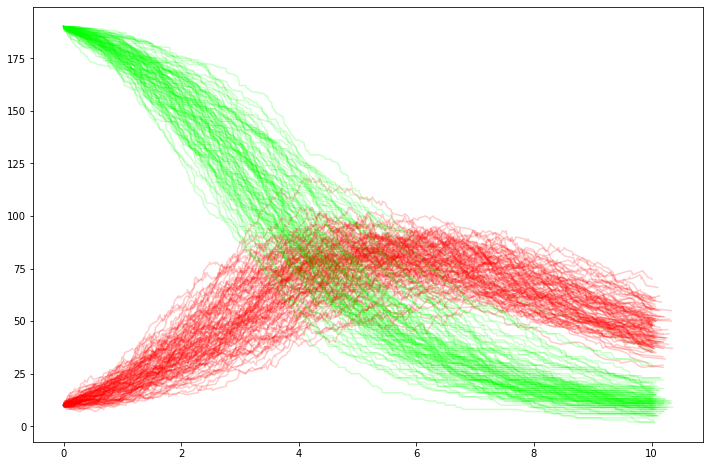

In [61]:
fig,ax = plt.subplots()

iniPop = [190,10]
popSize = np.sum(iniPop)

curBeta = 1 / popSize 
curGamma = 0.25

for i in range(100):
    ts,xs = pmf.multiGillespie(0,10,iniPop,(curBeta,curGamma),curMeta)
    ax.plot(ts,xs[:,0],color=(0,1,0,0.2))
    ax.plot(ts,xs[:,1],color=(1,0,0,0.2))

In [69]:

testMeta = ({
     'beta1 * S * I1' : ['S','E1'], # Infection due to infected
     'beta2 * S * I2' : ['S','E1'], # Infection due to variolated
     'nu1 * E1' : ['E1','I1'], # Disease progression
     'nu2 * E2' : ['E2','I2'], # Disease progression
     'gamma1 * I1' : ['I1','R'], # Disease progression
     'gamma2 * I2' : ['I2','R'], # Disease progression
     'tau * rho * I1' : ['I1','S'], # Re-birth, no variolation
     'tau * rho * I2' : ['I2','S'], # Re-birth, no variolation
     'tau * rho * E1' : ['E1','S'], # Re-birth, no variolation
     'tau * rho * E2' : ['E2','S'], # Re-birth, no variolation
     'tau * rho * R' : ['R','S'], # Re-birth, no variolation
     'tau * rho * S' : ['S','S'], # Re-birth, no variolation
     'tau * (1-rho) * I1' : ['I1','E2'], # Re-birth, variolation
     'tau * (1-rho) * I2' : ['I2','E2'], # Re-birth, variolation
     'tau * (1-rho) * E1' : ['E1','E2'], # Re-birth, variolation
     'tau * (1-rho) * E2' : ['E2','E2'], # Re-birth, variolation
     'tau * (1-rho) * R' : ['R','E2'], # Re-birth, variolation
     'tau * (1-rho) * S' : ['S','E2'], # Re-birth, variolation
},
['S','E1','E2','I1','I2','R'],['beta1','beta2','nu1','nu2','gamma1','gamma2','tau','rho'])



In [70]:

# iniPop = [90,5,5,0,0,0]
# popSize = np.sum(iniPop)

# curBeta1 = 0.2  
# curGamma1 = 0.25
# curBeta2 = curBeta1*0.25
# curGamma2 = curGamma1 
# curNu1 = curGamma1 
# curNu2 = curNu1 
# curTau = 0.01
# curRho = 0.9

# pars = {'beta1':0.1,'beta2':0.1,'nu1':0.1,'nu2':0.1,'gamma1':0.1,'gamma2':0.1,'tau':0.1,'rho':0.1}

# # Run a test simulation
# tEnd = 250
# sch1 = pmf.Scheme(testMeta,iniPop,pars,0,tEnd,Changes=[])
# sch1.tRes = 1000
# sch1.simulate()

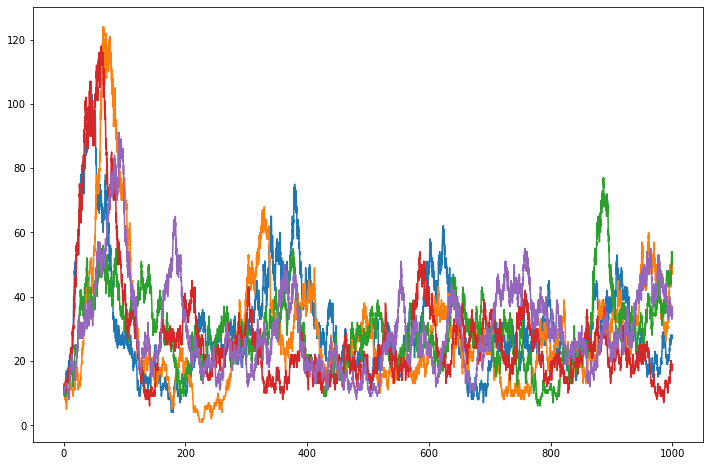

In [96]:
fig,ax = plt.subplots()

iniPop = [990,5,5,0,0,0]
popSize = np.sum(iniPop)

curBeta1 = 0.4 / popSize 
curGamma1 = 0.25
curBeta2 = curBeta1*0.25
curGamma2 = curGamma1 
curNu1 = curGamma1 
curNu2 = curNu1 
curTau = 0.01
curRho = 0.9

pars = (curBeta1,curBeta2,curNu1,curNu2,curGamma1,curGamma2,curTau,curRho)
# pars = [curBeta1,curBeta2,curNu1,curNu2,curGamma1,curGamma2,curTau,curRho]

for i in range(5):
    ts,xs = pmf.multiGillespie(0,1000,iniPop,pars,testMeta)
    # ax.plot(ts,xs[:,0],color=(0,1,0,0.2))
    # ax.plot(ts,xs[:,1],color=(1,0,0,0.2))
    # ax.plot(ts,xs[:,2],color=(0,0,1,0.2))
    # ax.plot(ts,xs[:,3],color=(1,0,1,0.2))
    # ax.plot(ts,xs[:,4],color=(1,1,0,0.2))
    # ax.plot(ts,xs[:,5],color=(0,0,0.5,0.2))
    curInf = np.sum(xs[:,1:5],axis=1)
    ax.plot(ts,curInf)

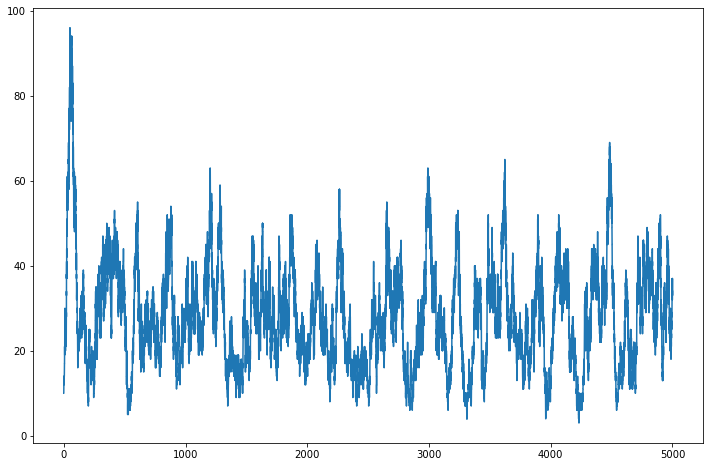

In [98]:
fig,ax = plt.subplots()
for i in range(1):
    ts,xs = pmf.multiGillespie(0,5000,iniPop,pars,testMeta)
    # ax.plot(ts,xs[:,0],color=(0,1,0,0.2))
    # ax.plot(ts,xs[:,1],color=(1,0,0,0.2))
    # ax.plot(ts,xs[:,2],color=(0,0,1,0.2))
    # ax.plot(ts,xs[:,3],color=(1,0,1,0.2))
    # ax.plot(ts,xs[:,4],color=(1,1,0,0.2))
    # ax.plot(ts,xs[:,5],color=(0,0,0.5,0.2))
    curInf = np.sum(xs[:,1:5],axis=1)
    ax.plot(ts,curInf)